In [1]:
import sys
sys.path.insert(0,'./src/')
from curve import *
from utility_and_spec import *
import numpy as np
from matplotlib import pyplot as plt
from tube import *

In [2]:
l1 = pt(-5,0)
l2 = pt(4,-3)
l3 = pt(4,3)
ls = np.array([l1,l2,l3])
rs = np.array([1,1,1])
Y = NLets(ls,rs,corner_size=1)

In [3]:
Y.build_geometry(legendre_ratio=1e-14,max_distance=1e-2)

In [4]:
Y.build_graph()
flow = Y.flows[0]
U = Y.get_bounadry_velocity_condition(0)

In [ ]:
Y.build_A()
Y.solve(tol=1e-12)

In [33]:
pts = []
for c in Y.curves:
    if isinstance(c,Cap):
        pts += [c.start_pt, c.matching_pt]
    elif isinstance(c,Line):
        pts += [c.start_pt, c.mid_pt]
    elif isinstance(c,Corner):
        pts += [[c.x[i], c.y[i]] for i in range(len(c.a))]
pts = np.array(pts)

left = np.min(pts[:,0])
right = np.max(pts[:,0])
up = np.max(pts[:,0])
down = np.min(pts[:,0])

In [35]:
n = np.sqrt(100)
xs = np.linspace(left,right,int(np.ceil(n*(right-left))))
ys = np.linspace(down,up,int(np.ceil(n*(up-down))))
xs,ys = np.meshgrid(xs,ys)

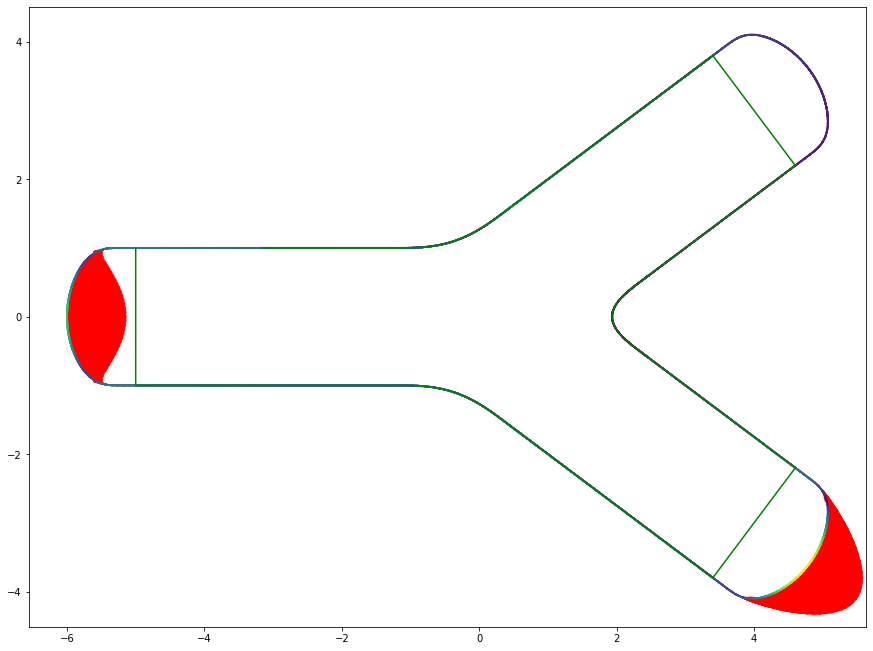

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect(1)
ax.quiver(Y.x,Y.y,U[:,0],U[:,1],color='red')
ax.scatter(Y.x,Y.y,c=np.abs(Y.omegas[0]),s=1)
ax.plot(pts[:,0],pts[:,1],c='green')

In [17]:
Y.extend

AttributeError: 'NLets' object has no attribute 'extend'